In [106]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [107]:
df = pd.read_csv('../data/penguins.csv')

In [108]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [109]:
df = df.dropna()

In [110]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [111]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


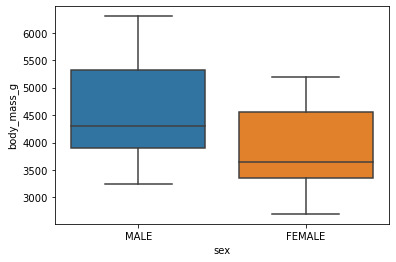

In [112]:
sex_boxplot = sns.boxplot(x="sex", y="body_mass_g", data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


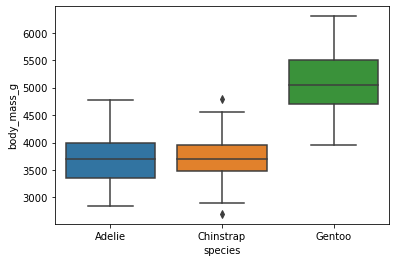

In [113]:
print(sns.boxplot(x="species", y="body_mass_g", data=df))


AxesSubplot(0.125,0.125;0.775x0.755)


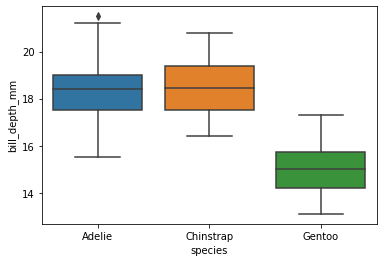

In [114]:
print(sns.boxplot(x="species", y="bill_depth_mm", data=df))


AxesSubplot(0.125,0.125;0.775x0.755)


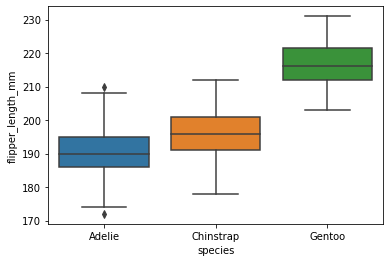

In [115]:
print(sns.boxplot(x="species", y="flipper_length_mm", data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


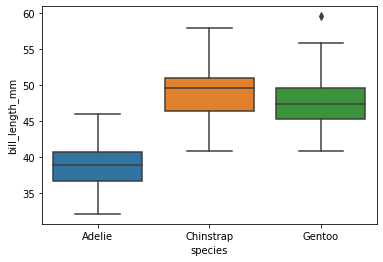

In [116]:
print(sns.boxplot(x="species", y="bill_length_mm", data=df))

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

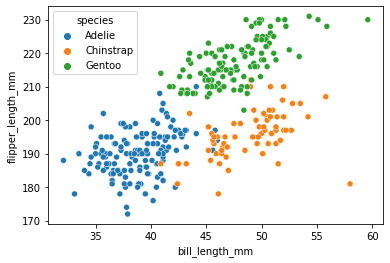

In [117]:
sns.scatterplot(data=df,x='bill_length_mm', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

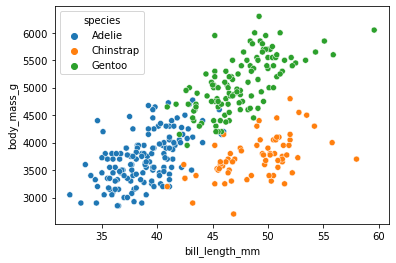

In [118]:
sns.scatterplot(data=df,x='bill_length_mm', y='body_mass_g', hue='species')

In [119]:
# df["sex"] = df['sex'].replace({'MALE': 0, 'FEMALE':1})
# df

In [120]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [121]:
# df1 = pd.get_dummies(df['island'])
# df['species'] = df['species'].replace({'Adelie': 0, 'Chinstrap':1, 'Gentoo':2})

In [122]:
# df = df.drop('island', axis=1)

In [123]:
# df = pd.concat([df, df1], axis=1)

In [124]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [125]:
X = df.drop('species', axis=1)
y = df['species']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
categorical_columns = ['island','sex']

In [128]:
numerical_columns =['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g']

In [129]:
categorical_pipeline= make_pipeline(OneHotEncoder(handle_unknown='ignore'))
numerical_pipeline = make_pipeline(StandardScaler())

In [130]:
pre_processor= make_column_transformer((categorical_pipeline,categorical_columns),
                                    (numerical_pipeline, numerical_columns))
pre_processor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['island', 'sex']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['bill_length_mm', 'bill_depth_mm',
                                  'flipper_length_mm', 'body_mass_g'])])

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
neigh = KNeighborsClassifier()

In [133]:
params = {
    'n_neighbors' : range(3,7)
}

In [134]:
grid = make_pipeline(pre_processor, GridSearchCV(neigh, param_grid=params,cv=5))
grid

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['island', 'sex']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
              

In [135]:
model_fit = grid.fit(X_train, y_train)

In [136]:
model = model_fit['gridsearchcv'].best_estimator_

In [137]:
best_model =  make_pipeline(pre_processor, model)

In [138]:
y_pred = best_model.predict(X_test)

In [139]:
accuracy_score(y_pred, y_test)

1.0

In [140]:
df.head(150)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE


In [147]:
b = ['Reunion',44,18.2,196,3750,'MALE']
a = pd.DataFrame([b])

a

,0,1,2,3,4,5
0,Reunion,44,18.2,196,3750,MALE


In [148]:
test = best_model.predict(a)

RuntimeError: Given feature/column names do not match the ones for the data given during fit.

In [149]:
test

array(['Adelie'], dtype=object)

In [146]:
best_model.predict_proba(a)

array([[1., 0., 0.]])